In [1]:
include("datasetloader.jl")
include("train.jl")

step! (generic function with 2 methods)

In [84]:
const PACKAGE_PATH = "."
M = Model(joinpath(PACKAGE_PATH, "ngrams"))

Model(["eng", "zho"], Dict("zho" => 2, "eng" => 1), Dict{Vector{UInt8}, Float32}[Dict([0x6e, 0x74, 0x20, 0x69, 0x6e, 0x74] => -13.408537, [0x6c, 0x65, 0x20, 0x61, 0x72] => -12.615268, [0x65, 0x65, 0x69] => -12.780086, [0x61, 0x64, 0x6f, 0x70, 0x74, 0x65] => -13.538923, [0x67, 0x65, 0x72, 0x69, 0x61, 0x6e, 0x73] => -13.684971, [0x72, 0x65, 0x6d, 0x69, 0x65, 0x72] => -12.913396, [0x6b, 0x20, 0x75, 0x70] => -12.88174, [0x68, 0x61, 0x74, 0x20, 0x6e, 0x65] => -13.169395, [0x20, 0x70, 0x72, 0x6f, 0x76, 0x69, 0x64] => -11.852873, [0x64, 0x20, 0x77, 0x61, 0x69, 0x74] => -13.835136…), Dict([0x98, 0xe6, 0xb4] => -13.081837, [0xbf, 0x90, 0xe5, 0x9f, 0x8e, 0xe5] => -11.856253, [0xaa, 0xe4, 0xba, 0x8e] => -13.079651, [0x81, 0xe5, 0x8c, 0x96] => -13.15991, [0x9b, 0xae, 0xe7, 0x9a, 0x84, 0xe5] => -13.119659, [0x88, 0x9b] => -11.285851, [0xba, 0xa6, 0xe5, 0x9c] => -13.412644, [0xaf, 0x86, 0xe5, 0xba, 0xa6, 0x20] => -12.980187, [0xbb, 0xba, 0xe7, 0xaf] => -12.284087, [0x8f, 0x90, 0xe4, 0xbe, 0x9b, 0x20

In [80]:
for Q in M.Qs
    for(k,v) in zip(keys(Q), shuffle(values(Q)|>collect))
        Q[k] = v
    end
end

In [76]:
WDs = [WikiDataSet("corpus/wikipedia/test", langs=[l]) for l in M.languages]
TDs = [TatoebaDataset("corpus/tatoeba", "tatoeba_test.txt", langs=[l]) for l in M.languages]
datasets = [WDs; TDs]
D = BatchedLoader(WeightedLoader(datasets, weights=log.(length.(datasets))), 8)

BatchedLoader(WeightedLoader(Base.Iterators.Stateful{Base.Iterators.Cycle{RandomLoader}, Union{Nothing, Tuple{Any, Int64}}, Int64}[Base.Iterators.Stateful{Base.Iterators.Cycle{RandomLoader}, Union{Nothing, Tuple{Any, Int64}}, Int64}(Base.Iterators.Cycle{RandomLoader}(RandomLoader(["06:21:03:11 Up Evil is an album by Front 242, released in 1993. 5  6  1 \nUtilising a simple alphanumeric conversion from numbers to letters, i.e. 1=A, 2=B, 3=C, ..., 26=Z, the title can be interpreted as:\nWhich gives a full album title of Fuck Up Evil.\nTrouser Press called the album \"strong but not striking,\" and preferred 05:22:09:12 Off. 5  Entertainment Weekly called it \"a tad ambitious,\" writing that \"this aural exorcist is more gripping than previous efforts.\" 4 \nAll tracks are written by Front 242Track 12 & 13 on CD version only.\nThis 1990s electronic music album-related article is a stub. You can help Wikipedia by expanding it." => "eng", "Events from the year 1797 in Sweden\nThis year in S

In [77]:
l, grad = loss_and_grad(M, first(D), 5)
step!(M, grad)
M.default_q, l

(-13.91796f0, 0.3765806560556957)

In [140]:
using Plots
using SampledVectors
function plot_series(names_values...)
    for (name, value) in names_values
        isempty(value) && continue
        fig = plot(collect(sampledindexes(value)), sampled(value), label="", linecolor=:gray80)
        title!(fig, name)
        y = mean.(Iterators.partition(value, 100))
        x = range(50, step=100, length=length(y))
        fig = plot!(x, y, label="")
        savefig("figs/$(name).png")
        if sum(abs.(extrema(y) .- ylims())) > only(diff(collect(extrema(y))))
            title!(fig, "$name zoom")
            ylims!(fig, extrema(y))
            savefig("figs/$(name)-zoom.png")
        end
    end
end

plot_series (generic function with 1 method)

In [142]:
plot_series("loss" => loss_list)


In [85]:
loss_list = SampledVector{Float64}(4096)
default_q_list = SampledVector{Float64}(4096)

0-element SampledVector{Float64, Int64, Int64, Int64, Int64}

In [145]:
for i in 1:2000
    l, grad = loss_and_grad(M, first(D), rand(3:7))
    step!(M, grad, 0.01)
    push!(loss_list, l)
    push!(default_q_list, M.default_q)
    if i % 100 == 0
        plot_series("loss" => loss_list, "default_q" => default_q_list)
    end
end


0.012249351824329659

28.472962285619644

In [94]:
length(sampledindexes(loss_list))

4000

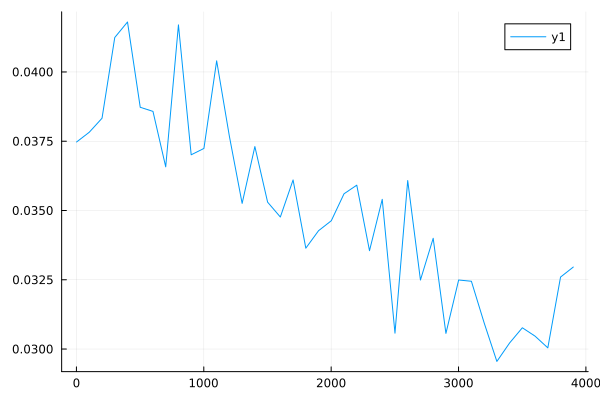

In [91]:
plot(1:100:length(loss_list), )